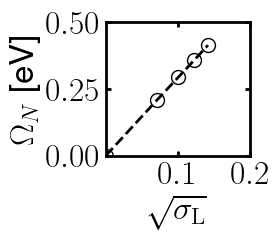

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp

# Turn this parameter to False if LaTeX is not installed
if_latex = True

# Sample data
file_numbers2 = np.array([0, 1, 5, 10, 50, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500])
sigmas = np.sqrt(file_numbers2 * 0.00001) # Conversion to meep units
Rabi_splitting = [0,
 0.0004699999999999982,
 0.0006000000000000033,
 0.0008500000000000035,
 0.0016619999999999968,
 0.002270000000000008,
 0.0050170000000000076,
 0.007063,
 0.008633000000000002,
 0.009978,
 0.011126999999999998,
 0.012220999999999996,
 0.013173000000000004,
 0.014098,
 0.014911000000000008,
 0.015751999999999988,
 0.016507999999999995]
Rabi_splitting = np.array(Rabi_splitting) * 41.357 # Conversion to SI units

# Fig. 1 in the paper contains only five data points. We will plot only the five data points presented in the paper
idx_used = np.array([0, 6, 7, 8, 9], dtype=np.int32)
sigmas = sigmas[idx_used]
Rabi_splitting = Rabi_splitting[idx_used]

xs = [sigmas]*2 
ys = [Rabi_splitting]*2
colors = ["ko", "k--"]
labels = ["SC",""]

# Plotting using columnplots (clp)
ax = clp.initialize(col=1, row=1,
                    width=2.9, height=2.5,
                    LaTeX=if_latex,
                    fontsize=24)

# Plot each figure
clp.plotone(xs, ys, ax, colors=colors, labels=labels, lw=2., markersize=10,
            ylabel=r'$\Omega_N$ [eV]', xlabel=r"$\sqrt{\sigma_{\mathrm{L}}}$", ylim=(np.min(ys[0]),np.max(ys[0])), xlim=(0,np.max(xs[0])),
            showlegend=False, yscientificAtLabel=False)
ax.set_xticks([0.1,0.2])
ax.set_yticks([0.0,0.25,0.50])
ax.tick_params(width=2)
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.set_xlim(left=0)  # Ensure x-axis starts from 0 (but no tick at 0)
ax.set_ylim(bottom=0)  # Ensure y-axis starts from 0 (but no tick at 0)

# Tune the spacing between subplots and save file as example.png
clp.adjust(tight_layout=True, savefile="Fig1_Additional.png")


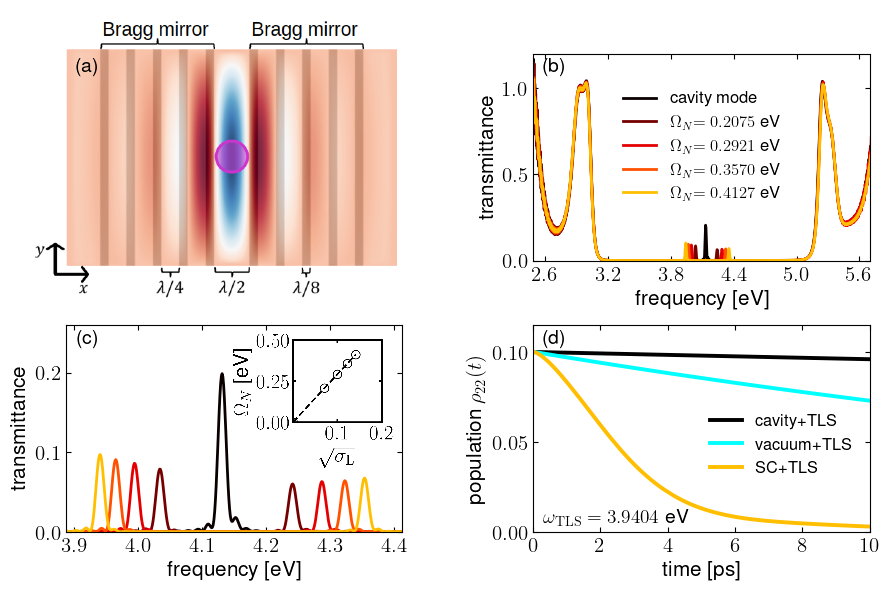

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

# Saving data set 1
###---------------------------------------------------------------------------------------------------------------
xs = [1]
ys = [1]
colors = ["wo"]
labels = [""]
###---------------------------------------------------------------------------------------------------------------

#Saving data set 2
###---------------------------------------------------------------------------------------------------------------
file_numbers = [0,1,2,3,4]
Rabi_splitting = [0, 0.102565-0.097548, 0.103658 - 0.096595, 0.104527-0.095894, 0.105283 - 0.095305]
# Initialize lists to store data from all files
def read_spectrum(filename):
    data = np.loadtxt(filename, usecols=(0, 2))  # Read first and third columns
    x = data[:, 0]  # First column
    y = data[:, 1]  # Third column
    return x, y

data_freq2 = []
data_spectrum2 = []

for number in file_numbers:
    filename = f"./Paper/Figure1/Figure_b&c/data2_spectrum2_gamma5_sigma_{number}.txt"
    x, y = read_spectrum(filename)  # Unpack the values
    data_freq2.append(x)
    data_spectrum2.append(y)

cmap = plt.get_cmap('Paired')
# Ensure xs_Rabi and ys_Rabi are created from the collected data
xs_Rabi2 = data_freq2
xs_Rabi2 = np.array(xs_Rabi2)*41.357 # Conversion to SI units
ys_Rabi2 = data_spectrum2  # Two identical datasets to plot with different styles
labels2 = ["cavity mode"]
for value in Rabi_splitting[1:]:
    labels2.append(r"$\Omega_{\mathrm{N}}$" + f"$= {value*41.357:.4f}$ eV")
labels2.extend(["Lorentz+TLS", ""])
###---------------------------------------------------------------------------------------------------------------

#Saving data set 3
###---------------------------------------------------------------------------------------------------------------
file_numbers = [0, 5, 10, 15, 20]
Rabi_splitting = [0, 0.102565-0.097548, 0.103658 - 0.096595, 0.104527-0.095894, 0.105283 - 0.095305]
# Initialize lists to store data from all files
def read_spectrum(filename):
    data = np.loadtxt(filename, usecols=(0, 2))  # Read first and third columns
    x = data[:, 0]  # First column
    y = data[:, 1]  # Third column
    return x, y
data_freq = []
data_spectrum = []
for number in file_numbers:
    filename = f"./Paper/Figure1/Figure_b&c/data_spectrum2_gamma5_sigma_{number}.txt"
    x, y = read_spectrum(filename)  # Unpack the values
    data_freq.append(x)
    data_spectrum.append(y)

cmap = plt.get_cmap('Paired')
# Ensure xs_Rabi and ys_Rabi are created from the collected data
xs_Rabi = data_freq
xs_Rabi = np.array(xs_Rabi)
xs_Rabi = xs_Rabi * 41.357
ys_Rabi = data_spectrum  # Two identical datasets to plot with different styles
colors2 = ["k", "k", "k", "k",'k']
labels2 = ["cavity mode"]
for value in Rabi_splitting[1:]:
    labels2.append(r"$\Omega_{N}$" + f"$= {value*41.357:.4f}$ eV")
labels2.extend(["Lorentz+TLS", ""])
###---------------------------------------------------------------------------------------------------------------

#Saving data set 4
###---------------------------------------------------------------------------------------------------------------
# Define file paths
path = "./Paper/Figure1/Figure_d/trajEh_TLS_DECAY_C.txt"
path2 = "./Paper/Figure1/Figure_d/trajEh_TLS_DECAY_Vacuum.txt"
path3 = "./Paper/Figure1/Figure_d/trajEh_TLS_DECAY_C&LM.txt"

# Read data from file and store in lists
def read_data2(path):
    x_data, y_data = [], []
    with open(path, 'r') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                data = line.split()
                x_data.append(float(data[0]))
                y_data.append(float(data[1]))
    return x_data, y_data

x, y = read_data2(path)
x2, y2 = read_data2(path2)
x3, y3 = read_data2(path3)

xs_LP = [x, x2, x3]
ys_LP = [y, y2, y3]

xs_LP = np.array(xs_LP)*0.1*0.001
ys_LP = np.array(ys_LP)
# Define colors, labels, and alpha values
colors3 = ["k", "cyan", "tab:red"]
linestyles = ["-", "-", "-"]
labels3 = ["cavity+TLS", "vacuum+TLS", "SC+TLS"]
###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)
axes = clp.initialize(col=2, row=2,
                    width=9, height=6,
                    LaTeX=if_latex, labelthem=True, labelsize=14, labelthemPosition=[0.1, 0.976],
                    fontsize=15)

# 2. Plot each figure
clp.plotone(xs, ys, axes[0,0], colors=colors, labels=labels, lw=2, ylog=False, alpha=0,
            showlegend=False, legendloc="lower right", yscientificAtLabel=False)
clp.plotone(xs_Rabi2, ys_Rabi2, axes[0,1], labels=labels2, colors=colors2, lw=2, ylog=False, xlim=(np.min(xs_Rabi2[0]),5.7), ylim=(0,1.2),
            ylabel='transmittance', xlabel="frequency [eV]",
            showlegend=True, yscientificAtLabel=False)
clp.plotone(xs_Rabi, ys_Rabi, axes[1,0], labels=labels2, lw=2, colors=colors2, ylog=False, xlim=(0.094*41.357,0.1067*41.357), ylim=(-0.0,0.26),
            ylabel='transmittance', xlabel="frequency [eV]",
            showlegend=False, yscientificAtLabel=False)
clp.plotone(xs_LP, ys_LP, axes[1,1], colors=colors3, labels=labels3, lw=2.8, ylog=False, xlog=False, linestyles=linestyles, ylim=(-0.0,0.115), xlim=(0,10),
            ylabel=r'population $\rho_{22}(t)$', xlabel=r"time [ps]", #legendloc="lower left",
            showlegend=True, yscientificAtLabel=False)

clp.add_figure('SetUp4.png',axes[0,0],zoom=0.515, location=(1,1))
clp.add_figure('Fig1_Additional.png',axes[1,0],zoom=0.147, location=(4.275,0.165))
colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
colors3 = colors2[2:]
for i,j in enumerate(axes[0,1].lines[0:5]):
    j.set_color(colors2[i])

for i,j in enumerate(axes[1,0].lines[0:5]):
    j.set_color(colors2[i])

for i,j in enumerate(axes[1,1].lines[0:3]):
    if i == 2:
        j.set_color(colors3[i])

axes[0,0].set_yticks([])
axes[0,0].set_xticks([])
axes[1,0].set_xticks([3.9,4.0,4.1,4.2,4.3,4.4])
axes[0,1].set_xticks([2.6,3.2,3.8,4.4,5.,5.6])
axes[0,0].axis('off')
axes[1,0].set_yticks([], minor=True)
axes[1,0].tick_params(axis='y',direction='in')
axes[0,1].tick_params(axis='y',direction='in')
axes[1,1].tick_params(axis='y',direction='in')
axes[1,1].tick_params(axis='x',direction='in', which='both')
axes[0,1].legend(loc='center', bbox_to_anchor=(0.5, 0.55), edgecolor='white',framealpha=0, fontsize=12)
axes[1,1].legend(loc='center', bbox_to_anchor=(0.735, 0.42), edgecolor='white', framealpha=0, fontsize=11.8)
axes[1,1].text(0.3,0.005, r'$\omega_{\mathrm{TLS}} = 3.9404$ eV', fontsize=14) #0.0955
clp.adjust(tight_layout=True, savefile="setup2.pdf")


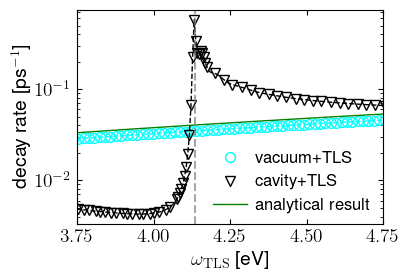

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

# Frequency range and file numbers
freq_range = np.linspace(0.09, 0.115, 200)
x_decay = []
y_decay = []
x_decay2 = []
y_decay2 = []

for freq in freq_range:
    filename = "./Paper/Figure2/trajEh_TLS_DECAY_Vacuum_TLSFrequency_%.6f.txt" %(freq)
    try:
        data1, data2 = read_data(filename)
        x_decay.append(data1)
        y_decay.append(data2)
    except OSError:
        print(f"File {filename} not found.")

for freq in freq_range:
    filename = "./Paper/Figure2/trajEh_TLS_DECAY_Cavity_TLSFrequency_%.6f.txt" %(freq)
    try:
        data1, data2 = read_data(filename)
        x_decay2.append(data1)
        y_decay2.append(data2)
    except OSError:
        print(f"File {filename} not found.")

fitting_params = {}
fitting_params2 = {}
b_values = []
b_values2 = []

for freq, x_exp, y_exp in zip(freq_range, x_decay, y_decay):
    if len(x_exp) > 0 and len(y_exp) > 0:
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)
        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values.append(b_value)
            fitting_params[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

b_values = np.array(b_values)

for freq, x_exp, y_exp in zip(freq_range, x_decay2, y_decay2):
    if len(x_exp) > 0 and len(y_exp) > 0:
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)
        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values2.append(b_value)
            fitting_params2[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

b_values2 = np.array(b_values2)

# Let's consider more points to plot around the center region
num_points = 60
indices = np.linspace(0, len(b_values) - 1, num_points, dtype=int)
num_points2 = 60
indices2 = np.linspace(0, len(b_values2) - 1, num_points2, dtype=int)
selected_pointsy = b_values[indices]
selected_pointsy2 = b_values2[indices2]
selected_pointsx = freq_range[indices]
selected_pointsx2 = freq_range[indices2]

# Example x and y arrays
x = freq_range  # Example x data (e.g., time or indices)
y = b_values2  # Example y data (e.g., measurements)

# Select 40 equidistant points from y
total_points = 60
middle_fraction = 0.3  # Fraction of points to select from the middle

num_middle_points = int(total_points * middle_fraction)
num_edge_points = total_points - num_middle_points

middle_start = len(y) // 2 - num_middle_points // 2 - 22
middle_end = middle_start + num_middle_points
middle_indices = np.arange(middle_start, middle_end)

left_edge_indices = np.linspace(0, middle_start - 1, num_edge_points // 2, dtype=int)
right_edge_indices = np.linspace(middle_end, len(y) - 1, num_edge_points - num_edge_points // 2, dtype=int)

selected_indices = np.concatenate([left_edge_indices, middle_indices, right_edge_indices])

# Select the corresponding y data
selected_y = y[selected_indices]

# Select the corresponding x data using the same indices
selected_x = x[selected_indices]

# Parameters for the two-level system (TLS)
mu12_default = 0.03
rho_11_0 = 0.9  # Population of the ground state at time t = 0 (arbitrary)

# Range for omega_TLS (transition frequency) in rad/s
omega_tls = np.linspace(0.09, 0.115, 200)  # Example range from 10 THz to 1 PHz

# Calculate k_sc in meep units
k_sc = (rho_11_0 * mu12_default**2 * omega_tls**2) / 2.0
k_sc_ps_inv = k_sc * 1e4

xs = [selected_pointsx*41.357,freq_range*41.357,freq_range*41.357,selected_x*41.357, omega_tls*41.357] # Rescaling
ys = [selected_pointsy*10000, b_values*10000] + [b_values2*10000, selected_y*10000, k_sc_ps_inv] # Rescaling

colors = ["ko", "k--", "k--", "kv", "g-"]
labels = ["vacuum+TLS", "", "", "cavity+TLS", "analytical result"]
markers = ['','o','','v']

# Plotting using columnplots (clp)
ax = clp.initialize(col=1, row=1,
                    width=4.2, height=2.9,
                    LaTeX=if_latex,
                    fontsize=14)

clp.plotone(xs, ys, ax, colors=colors, labels=labels, lw=1, markersize=7, ylog=True, xlim=(3.75,4.75),
            ylabel=r'decay rate [ps$^{-1}$]', xlabel="$\\omega_{{\\mathrm{{TLS}}}}$ [eV]",
            showlegend=True, yscientificAtLabel=False)

col = 'k'
col1 = 'cyan'
for i,j in enumerate(ax.lines[0:4]):
    if i == 0 or i==1:
        j.set_color(col1)
    if i == 2 or i==3:
        j.set_color(col)

ax.legend(loc='center', bbox_to_anchor=(0.7, 0.194), edgecolor='white', fontsize=12, framealpha=0,handletextpad=0.5)
ax.axvline(x=0.100*41.357, color='gray', linestyle='--', alpha=0.7)
ax.set_xticks([3.75,4.00,4.25,4.50,4.75])
ax.tick_params(axis='y',direction='in', which='both')

clp.adjust(tight_layout=True, savefile="Purcell_Effect.pdf")

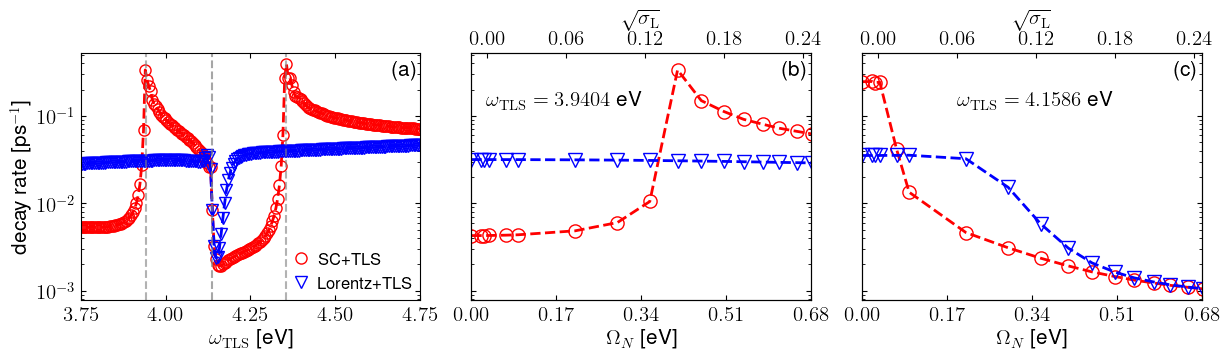

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

# Frequency range and file numbers
freq_range = np.linspace(0.09, 0.115, 200)

x_decay = []
y_decay = []
x_decay2 = []
y_decay2 = []

x2_decay = []
y2_decay = []
x2_decay2 = []
y2_decay2 = []

x3_decay = []
y3_decay = []
x3_decay2 = []
y3_decay2 = []

#Saving data set 1
###---------------------------------------------------------------------------------------------------------------
for freq in freq_range:
    filename = "./Paper/Figure3/Figure_a/trajEh_TLS_DECAY_C&LM_SIGMA_20_TLSFrequency_%.6f.txt" %(freq)
    try:
        data1, data2 = read_data(filename)
        x_decay.append(data1)
        y_decay.append(data2)
    except OSError:
        print(f"File {filename} not found.")

for freq in freq_range:
    filename = "./Paper/Figure3/Figure_a/trajEh_TLS_DECAY_LM_SIGMA_20_TLSFrequency_%.6f.txt" %(freq)
    try:
        data1, data2 = read_data(filename)
        x_decay2.append(data1)
        y_decay2.append(data2)
    except OSError:
        print(f"File {filename} not found.")

fitting_params = {}
fitting_params2 = {}
b_values = []
b_values2 = []

for freq, x_exp, y_exp in zip(freq_range, x_decay, y_decay):
    if len(x_exp) > 0 and len(y_exp) > 0:
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)
        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values.append(b_value)
            fitting_params[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

b_values = np.array(b_values)

for freq, x_exp, y_exp in zip(freq_range, x_decay2, y_decay2):
    if len(x_exp) > 0 and len(y_exp) > 0:
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)
        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values2.append(b_value)
            fitting_params2[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

b_values2 = np.array(b_values2)

xs = [freq_range*41.357] * 4 # Select x plotting values in SI units.
ys = [b_values*10000, b_values*10000] + [b_values2*10000, b_values2*10000] # Select y plotting values in SI units.

colors = ["ro", "r--", "bv", "b--"]
labels = ["SC+TLS", "", "Lorentz+TLS", ""]
###---------------------------------------------------------------------------------------------------------------

#Saving data set 3
###---------------------------------------------------------------------------------------------------------------
freq_range2 = np.linspace(0.09200, 0.112, 35)
file_numbers = [0,1,5,10,50,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500] 
sigmas2 = np.array(file_numbers)*0.00001 # Obtaining corresponding sigma values in MEEP units 
Rabi_splitting = [0,
 0.0004699999999999982,
 0.0006000000000000033,
 0.0008500000000000035,
 0.0016619999999999968,
 0.002270000000000008,
 0.0050170000000000076,
 0.007063,
 0.008633000000000002,
 0.009978,
 0.011126999999999998,
 0.012220999999999996,
 0.013173000000000004,
 0.014098,
 0.014911000000000008,
 0.015751999999999988,
 0.016507999999999995]
Rabi_splitting = np.array(Rabi_splitting)

# Read data from each file and store in x_decay and y_decay
for number in file_numbers:
    filename = f"./Paper/Figure3/Figure_c/trajEh_TLS_DECAY_C&LM_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x2_decay.append(data1)
        y2_decay.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Read data from each file and store in x_decay and y_decay
for number in file_numbers:
    filename = f"./Paper/Figure3/Figure_c/trajEh_TLS_DECAY_LM_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x2_decay2.append(data1)
        y2_decay2.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Perform fitting on collected data, fitting only 'b', with 'a=0.1' and 'c=0'
fitting_params_Rabi = {}
b_values_Rabi = []

fitting_params_Rabi2 = {}
b_values_Rabi2 = []

for freq, x_exp, y_exp in zip(freq_range2, x2_decay, y2_decay):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_Rabi.append(b_value)
            fitting_params_Rabi[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

for freq, x_exp, y_exp in zip(freq_range2, x2_decay2, y2_decay2):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_Rabi2.append(b_value)
            fitting_params_Rabi2[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

# Optionally save b values to an array for further use
b_values_Rabi = np.array(b_values_Rabi)
b_values_Rabi2 = np.array(b_values_Rabi2)

# Ensure b_values and freq_range have the same length
xs_Rabi = [Rabi_splitting*41.357] * 2 + [Rabi_splitting*41.357] * 2
ys_Rabi = [b_values_Rabi*10000, b_values_Rabi*10000, b_values_Rabi2*10000, b_values_Rabi2*10000]  # Two identical datasets to plot with different styles

colors2 = ["ro", "r--", "bv", "b--"]
labels2 = ["SC+TLS", "", "Lorentz+TLS", ""]
###---------------------------------------------------------------------------------------------------------------

#Saving data set 2
###---------------------------------------------------------------------------------------------------------------
file_numbers2 = np.array([0,1,5,10,50,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])  # Changed from np.linspace(0, 34, 35) to np.arange(35)
sigmas = file_numbers2*0.00001
Rabi_splitting2 = [0,
 0.0004699999999999982,
 0.0006000000000000033,
 0.0008500000000000035,
 0.0016619999999999968,
 0.002270000000000008,
 0.0050170000000000076,
 0.007063,
 0.008633000000000002,
 0.009978,
 0.011126999999999998,
 0.012220999999999996,
 0.013173000000000004,
 0.014098,
 0.014911000000000008,
 0.015751999999999988,
 0.016507999999999995]
Rabi_splitting2 = np.array(Rabi_splitting2)
Rabi_splitting3 = np.array(Rabi_splitting2)*41.357

# Read data from each file and store in x_decay and y_decay
for number in file_numbers2:
    #filename = f"/Users/andresfb/Documents/Mac_Data/LP_Rabi/trajEh_TLS_DECAY_C&LM_SIGMA_{number}.txt"
    filename = f"./Paper/Figure3/Figure_b/trajEh_TLS_DECAY_C&LM_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x3_decay.append(data1)
        y3_decay.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Read data from each file and store in x_decay and y_decay
for number in file_numbers2:
    #filename = f"/Users/andresfb/Documents/Mac_Data/LP_Rabi/trajEh_TLS_DECAY_LM_SIGMA_{number}.txt"
    filename = f"./Paper/Figure3/Figure_b/trajEh_TLS_DECAY_LM_SIGMA_{number}.txt"
    try:
        data1, data2 = read_data(filename)
        x3_decay2.append(data1)
        y3_decay2.append(data2)
    except OSError:
        print(f"File {filename} not found.")

# Perform fitting on collected data, fitting only 'b', with 'a=0.1' and 'c=0'
fitting_params_LP = {}
b_values_LP = []

fitting_params_LP2 = {}
b_values_LP2 = []

for freq, x_exp, y_exp in zip(file_numbers2, x3_decay, y3_decay):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_LP.append(b_value)
            fitting_params_LP[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

for freq, x_exp, y_exp in zip(file_numbers2, x3_decay2, y3_decay2):
    if len(x_exp) > 0 and len(y_exp) > 0:
        # Fix 'a' and 'c' parameters for fitting
        def exp_decay_fixed(x, b):
            return 0.1 * np.exp(-b * x)

        try:
            popt, _ = curve_fit(exp_decay_fixed, x_exp, y_exp, p0=(0.001,))
            b_value = popt[0]
            b_values_LP2.append(b_value)
            fitting_params_LP2[round(freq, 5)] = b_value
        except RuntimeError:
            print(f"Could not fit data for frequency {freq}")

# Optionally save b values to an array for further use
b_values_LP = np.array(b_values_LP)
b_values_LP2 = np.array(b_values_LP2)

# Ensure b_values and freq_range have the same length
xs_LP = [Rabi_splitting2*41.357] * 2 + [Rabi_splitting2*41.357] * 2
ys_LP = [b_values_LP*10000, b_values_LP*10000, b_values_LP2*10000, b_values_LP2*10000]  # Two identical datasets to plot with different styles

colors3 = ["ro", "r--", "bv", "b--"]
labels3 = ["SC+TLS", "", "Lorentz+TLS", ""]
###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)

axes = clp.initialize(col=1, row=3,
                    width=12.4, height=3.7,
                    LaTeX=if_latex, labelthem=True, labelsize=15, labelthemPosition=[0.99, 0.97], sharey=True, 
                    fontsize=15)

# 2. Plot each figure
clp.plotone(xs, ys, axes[0], colors=colors, labels=labels, lw=2, markersize=8, ylog=True, bothyticks=True,
            xlim=(3.75, 4.75), #xlim=[np.min(xs[0]), np.max(xs[0])],
            ylabel=r'decay rate [ps$^{-1}$]', xlabel="$\\omega_{{\\mathrm{{TLS}}}}$ [eV]",
            showlegend=True, legendloc="lower right", yscientificAtLabel=False)
clp.plotone(xs_Rabi, ys_Rabi, axes[2], colors=colors2, labels=labels2, lw=2, markersize=9.5, ylog=True,
            xlabel="$\\Omega_{{N}}$ [eV]",
            xlim=[np.min(xs_Rabi[0]), 0.68],
            showlegend=False, yscientificAtLabel=False)
clp.plotone(xs_LP, ys_LP, axes[1], colors=colors3, labels=labels3, lw=2, markersize=9.5, ylog=True,
            xlim=[np.min(xs_LP[0]), 0.68],
            xlabel="$\\Omega_{{N}}$ [eV]",
            showlegend=False, yscientificAtLabel=False)

axes[0].axvline(x=0.095305*41.357, color='gray', linestyle='--', alpha=0.6)
axes[0].axvline(x=0.105283*41.357, color='gray', linestyle='--', alpha=0.6)
axes[0].axvline(x=0.10*41.357, color='gray', linestyle='--', alpha=0.7)
axes[0].legend(loc='center', bbox_to_anchor=(0.79, 0.115), edgecolor='white', fontsize=12, framealpha=0, handletextpad=0.05)
axes[0].set_xticks([3.75,4.00,4.25,4.5,4.75])
axes[2].set_xticks(np.linspace(0, 0.68,5))
axes[1].set_xticks(np.linspace(0, 0.68,5))
axes[0].tick_params(axis='y',direction='in', which='both')
axes[2].tick_params(axis='y',direction='in', which='both')
axes[1].tick_params(axis='y',direction='in', which='both')
axes[2].text(0.19,1.3e-1, r'$\omega_{\mathrm{TLS}} = 4.1586$ eV', fontsize=15)
axes[1].text(0.03,1.3e-1, r'$\omega_{\mathrm{TLS}} = 3.9404$ eV', fontsize=15) 
axes[1].xaxis.set_ticks_position('bottom')

ax2 = axes[1].twiny()
ax2.plot(np.sqrt(sigmas),b_values_LP2*10000, color='w', marker='o', alpha=0)
ax2.set_xticks([0,0.06, 0.12, 0.18,0.24])
ax2.tick_params(axis='x',direction='in', which='both')
ax2.set_xlabel(r"$\sqrt{\sigma_{\mathrm{L}}}$") 

ax3 = axes[2].twiny()
ax3.plot(np.sqrt(sigmas2),b_values_Rabi2*10000, color='w', marker='o', alpha=0)
ax3.set_xticks([0,0.06, 0.12, 0.18,0.24])
ax3.tick_params(axis='x',direction='in', which='both')
ax3.set_xlabel(r"$\sqrt{\sigma_{\mathrm{L}}}$") 

# Optionally, customize ticks on the secondary axis
clp.adjust(tight_layout=True, savefile="DecayRates_combined.pdf")


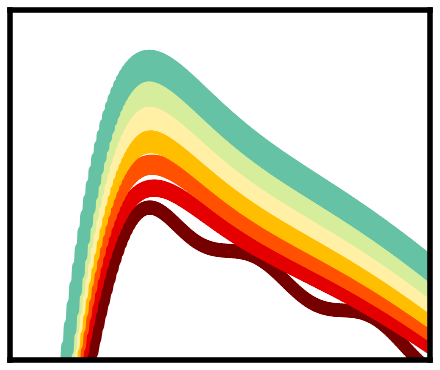

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

if_latex = False

# Frequency range and file numbers

#Saving data set 1
###---------------------------------------------------------------------------------------------------------------
def moving_average2(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

xs2=[]
ys2=[]
x_smooth2 = []
y_smooth2 = []
labels2 = []
colors = ["k", "tab:cyan", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:blue"]

sigma_numbers = [5,10,15,20,25,30,35]
Rabi_splitting2 = [0.102565-0.097548, 0.103658 - 0.096595, 0.104527-0.095894, 0.105283 - 0.095305, 0.105928-0.094801, 0.106545 - 0.094324, 0.107105-0.093932]


# Collect data for fitting
all_x_filtered2 = []
all_y_filtered2 = []
rabi_values2 = []


for number, rabi in zip(sigma_numbers, Rabi_splitting2):
    filename = f"./Paper/Figure4/Figure_b/EM_Energy_UP_Sigma_{number}.txt"
    data1, data2 = read_data(filename)

    y_smooth2 = moving_average2(data2, 200)
    x_smooth2 = data1[:len(y_smooth2)]

    num_points = 200
    indices = np.linspace(0, len(y_smooth2) - 1, num_points, dtype=int)

    y_smooth_norm = y_smooth2 / np.max(y_smooth2)

    x_filtered = [x_val for x_val in x_smooth2 if x_val > 5000]
    y_filtered = [y_smooth_norm[i] for i in range(len(x_smooth2)) if x_smooth2[i] > 5000]

    # Store data for later fitting
    all_x_filtered2.append(x_filtered)
    all_y_filtered2.append(y_filtered)
    rabi_values2.append(round(rabi, 4))

    # Store smoothed data for plotting
    xs2.append(x_smooth2)
    ys2.append(y_smooth2)

    labels2.append("SC $| \\omega_{{LP}} - \\omega_{{UP}} |$=" + f"{format(rabi, '.4f')}")

ax = clp.initialize(col=1, row=1,
                    width=4.5, height=3.8,
                    LaTeX=if_latex, fontname="Times New Roman",
                    fontsize=22)

# 2. Plot each figure
clp.plotone(xs2, ys2, ax, lw=8, ylog=False, colors=colors, xlim=(3300,7800), ylim=(3*10**(-4),4.6*10**(-4)),
            showlegend=False, legendloc="lower right", yscientificAtLabel=False)

colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
colors2 = colors2[1:]
for i,j in enumerate(ax.lines[0:4]):
    j.set_color(colors2[i])

colormap = plt.cm.Spectral
colors2 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
for i,j in enumerate(ax.lines[4:7]):
    j.set_color(colors2[i])
    


ax.tick_params(axis='y',direction='out')
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.set_yticks([])
ax.set_xticks([])
clp.adjust(tight_layout=True, savefile="Energy_zoom.png")

/var/folders/gn/4nhvlhyn31q87bh098tdyryc0000gn/T/ipykernel_3114/2011105283.py:22: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/var/folders/gn/4nhvlhyn31q87bh098tdyryc0000gn/T/ipykernel_3114/2011105283.py:22: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


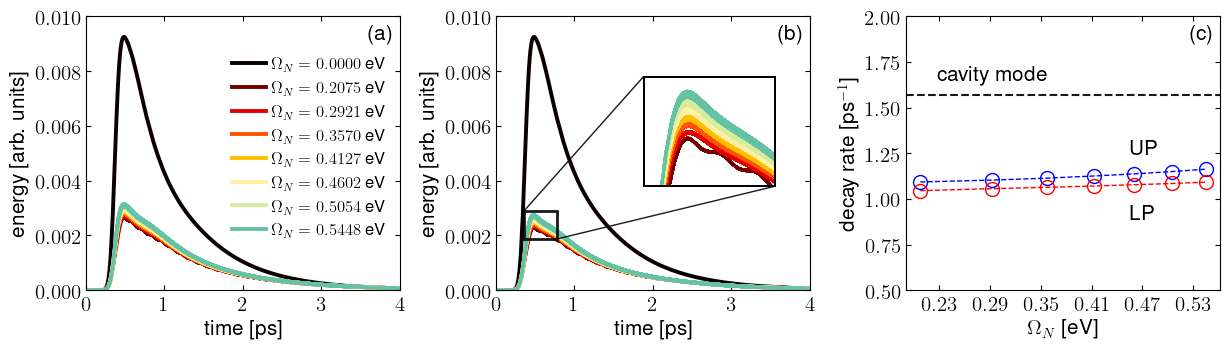

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

#Saving data set 1
###---------------------------------------------------------------------------------------------------------------
def moving_average2(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

xs=[]
ys=[]
x_smooth = []
y_smooth = []
labels = []
colors = ["grey", "tab:cyan", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:blue"]

sigma_numbers = [5,10,15,20,25,30,35]
Rabi_splitting1 = [0.102565-0.097548, 0.103658 - 0.096595, 0.104527-0.095894, 0.105283 - 0.095305, 0.105928-0.094801, 0.106545 - 0.094324, 0.107105-0.093932]
Rabi_splitting1 = np.array(Rabi_splitting1)*41.357 # Conversion to SI units

# Collect data for fitting
all_x_filtered = []
all_y_filtered = []
rabi_values = []

filename = "./Paper/Figure4/Figure_b/EM_Energy_UP_Sigma_0.txt"
data1, data2 = read_data(filename)

y_smooth = moving_average2(data2, 200)
x_smooth = data1[:len(y_smooth)]

y_smooth_norm = y_smooth / np.max(y_smooth)

# Store smoothed data for plotting
xs.append(x_smooth)
ys.append(y_smooth)

labels.append("$ \\Omega_{{N}}= 0.0000$ eV")


for number, rabi in zip(sigma_numbers, Rabi_splitting1):
    filename = f"./Paper/Figure4/Figure_b/EM_Energy_UP_Sigma_{number}.txt"
    data1, data2 = read_data(filename)

    y_smooth = moving_average2(data2, 200)
    x_smooth = data1[:len(y_smooth)]

    y_smooth_norm = y_smooth / np.max(y_smooth)

    x_filtered = [x_val for x_val in x_smooth if x_val > 5000]
    y_filtered = [y_smooth_norm[i] for i in range(len(x_smooth)) if x_smooth[i] > 5000]

    # Store data for later fitting
    all_x_filtered.append(x_filtered)
    all_y_filtered.append(y_filtered)
    rabi_values.append(round(rabi, 4))

    # Store smoothed data for plotting
    xs.append(x_smooth)
    ys.append(y_smooth)

    labels.append("$ \\Omega_{{N}} = %.4f$ eV" %(rabi))

# Perform fitting on collected data
fitting_params = {}
b_values = []  # Array to store the b fitting values

for rabi, x_filtered, y_filtered in zip(rabi_values, all_x_filtered, all_y_filtered):
    if len(x_filtered) > 0 and len(y_filtered) > 0:
        popt, _ = curve_fit(exp_decay, x_filtered, y_filtered, p0=(1, 0.001, 0))
        fitting_params[rabi] = popt
        b_values.append(popt[1])  # Store the b value

b_values = np.array(b_values)*10000 # Conversion to SI units
###---------------------------------------------------------------------------------------------------------------

#Saving data set 2
###---------------------------------------------------------------------------------------------------------------
xs2=[]
ys2=[]
x_smooth2 = []
y_smooth2 = []
labels2 = []
colors = ["k","k","tab:cyan", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:blue"]
Rabi_splitting2 = [0.102565-0.097548, 0.103658 - 0.096595, 0.104527-0.095894, 0.105283 - 0.095305, 0.105928-0.094801, 0.106545 - 0.094324, 0.107105-0.093932]


# Collect data for fitting
all_x_filtered2 = []
all_y_filtered2 = []
rabi_values2 = []

filename = "./Paper/Figure4/Figure_a/EM_Energy_LP_Sigma_0.txt"
data1, data2 = read_data(filename)

y_smooth2 = moving_average2(data2, 200)
x_smooth2 = data1[:len(y_smooth2)]

y_smooth_norm = y_smooth2 / np.max(y_smooth2)

# Store smoothed data for plotting
xs2.append(x_smooth2)
ys2.append(y_smooth2)

labels2.append("$\\Omega_N$ = 0.0000")

for number, rabi in zip(sigma_numbers, Rabi_splitting2):
    filename = f"./Paper/Figure4/Figure_a/EM_Energy_LP_Sigma_{number}.txt"
    data1, data2 = read_data(filename)

    y_smooth2 = moving_average2(data2, 200)
    x_smooth2 = data1[:len(y_smooth2)]

    y_smooth_norm = y_smooth2 / np.max(y_smooth2)

    x_filtered = [x_val for x_val in x_smooth2 if x_val > 5000]
    y_filtered = [y_smooth_norm[i] for i in range(len(x_smooth2)) if x_smooth2[i] > 5000]

    # Store data for later fitting
    all_x_filtered2.append(x_filtered)
    all_y_filtered2.append(y_filtered)
    rabi_values2.append(round(rabi, 4))

    # Store smoothed data for plotting
    xs2.append(x_smooth2)
    ys2.append(y_smooth2)

    labels2.append("SC $| \\omega_{{LP}} - \\omega_{{UP}} |$=" + f"{format(rabi, '.4f')}")

# Perform fitting on collected data
fitting_params2 = {}
b_values2 = []  # Array to store the b fitting values

for rabi, x_filtered, y_filtered in zip(rabi_values2, all_x_filtered2, all_y_filtered2):
    if len(x_filtered) > 0 and len(y_filtered) > 0:
        popt, _ = curve_fit(exp_decay, x_filtered, y_filtered, p0=(1, 0.001, 0))
        fitting_params2[rabi] = popt
        b_values2.append(popt[1])  # Store the b value

b_values2 = np.array(b_values2)*10000 # Conversion to SI untis
###---------------------------------------------------------------------------------------------------------------
xs2 = np.array(xs2)*0.00010
ys2 = np.array(ys2)*1e-18*6.242e+18
xs = np.array(xs)*0.00010
ys = np.array(ys)*1e-18*6.242e+18

#Saving data set 3
###---------------------------------------------------------------------------------------------------------------
# Define file paths
empty_xs=[]
empty_ys=[]
filtered_empty_xs=[]
filtered_empty_ys=[]

filename = "./Paper/Figure4/Figure_a/EM_Energy_LP_Sigma_0.txt"
data1, data2 = read_data(filename)

empty_y_smooth = moving_average2(data2, 200)
empty_x_smooth = data1[:len(empty_y_smooth)]

# Store smoothed data for plotting
empty_xs.append(empty_x_smooth)
empty_ys.append(empty_y_smooth)

y_smooth_norm = empty_y_smooth / np.max(empty_y_smooth)

x_filtered = [x_val for x_val in empty_x_smooth if x_val > 5000]
y_filtered = [y_smooth_norm[i] for i in range(len(empty_x_smooth)) if empty_x_smooth[i] > 5000]

# Store data for later fitting
filtered_empty_xs.append(x_filtered)
filtered_empty_ys.append(y_filtered)

fitting_params3 = {}
b_values3 = []  # Array to store the b fitting values

for x_filtered, y_filtered in zip(filtered_empty_xs, filtered_empty_ys):
    if len(x_filtered) > 0 and len(y_filtered) > 0:
        popt, _ = curve_fit(exp_decay, x_filtered, y_filtered, p0=(1, 0.001, 0))
        fitting_params3[rabi] = popt
        b_values3.append(popt[1])  # Store the b value

b_values3 = np.array(b_values3)*10000

empty_rate = b_values3[0]

xs3 = [Rabi_splitting1]*4
ys3 = [b_values, b_values, b_values2, b_values2]

# Define colors, labels, and alpha values
colors3 = ["b--", "bo", "r--", "ro"]
labels3 = ["UP", "", "LP", ""]

###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)

axes = clp.initialize(col=1, row=3,
                    width=12.4, height=3.6,
                    LaTeX=if_latex, labelthem=True, labelsize=15, labelthemPosition=[0.98, 0.97],  
                    fontsize=15)

# 2. Plot each figure
clp.plotone(xs2, ys2, axes[0], colors=colors, labels=labels, lw=2.8, ylog=False, xlim=(0,4), ylim=(0., 0.01),
            showlegend=True, ylabel='energy [arb. units]', xlabel="time [ps]", legendloc="lower right", yscientificAtLabel=False)
clp.plotone(xs, ys, axes[1], labels=labels, lw=2.8, ylog=False, colors=colors, xlim=(0,4), ylim=(0., 0.01),
            showlegend=False, ylabel='energy [arb. units]', xlabel="time [ps]", legendloc="lower right", yscientificAtLabel=False)
clp.plotone(xs3, ys3, axes[2], colors=colors3, labels=labels3, lw=1, ylog=False, ylim=(0.5*10**(0),2.*10**(0)), markersize=10, #xlim=(-9400,106111),
            ylabel=r'decay rate [ps$^{-1}$]', xlabel="$\\Omega_{{N}}$ [eV]", #legendloc="lower left",
            showlegend=False, yscientificAtLabel=False)

colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
for i,j in enumerate(axes[0].lines[0:5]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[0:5]):
    j.set_color(colors2[i])

colormap = plt.cm.Spectral
colors2 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
for i,j in enumerate(axes[0].lines[5:8]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[5:8]):
    j.set_color(colors2[i])

clp.add_figure('Energy_zoom.png',axes[1],zoom=0.0745, location=(2.715,9.47e+2*1e-18*6.13e+18*1e-6))
axes[0].tick_params(axis='y',direction='in')
axes[1].tick_params(axis='y',direction='in')
axes[2].tick_params(axis='y',direction='in')
axes[0].legend(loc='center', bbox_to_anchor=(0.71, 0.52), edgecolor='white', framealpha=0, fontsize=12,handletextpad=0.3)
axes[2].set_xticks([0.23,0.29,0.35,0.41,0.47,0.53])
energy_ticks = [0.0,1.0,2.0,3.0,4.0]
axes[0].set_xticks(energy_ticks)
axes[1].set_xticks(energy_ticks)

# Define the region to zoom in on
x1, x2, y1, y2 = 0.360, 0.780, 3*10**2*1e-18*6.242e+18*1e-6, 4.65*10**2*1e-18*6.242e+18*1e-6  # (x_min, x_max, y_min, y_max)
# Create inset axes
x0, y0, width, height = 0.47, 0.38, 0.42, 0.4  # Adjust as needed
# Create inset axes at specific coordinates
ax_inset = axes[1].inset_axes([x0,y0,width,height], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[],zorder=-5)  # Adjust size and location
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_title('')
axes[1].indicate_inset_zoom(ax_inset, edgecolor="black",linewidth=2, ec='black', ls='-', fc='none', alpha=0.9)
axes[2].axhline(y=empty_rate, color='k', linestyle='--', alpha=0.9)
axes[2].text(0.011*41.357,1.25*1e-0, 'UP', fontsize=15)
axes[2].text(0.011*41.357,0.89*1e-0, 'LP', fontsize=15)
axes[2].text(0.0055*41.357,1.65*1e-0, 'cavity mode', fontsize=15)

clp.adjust(tight_layout=True, savefile="polariton_relaxation.pdf")


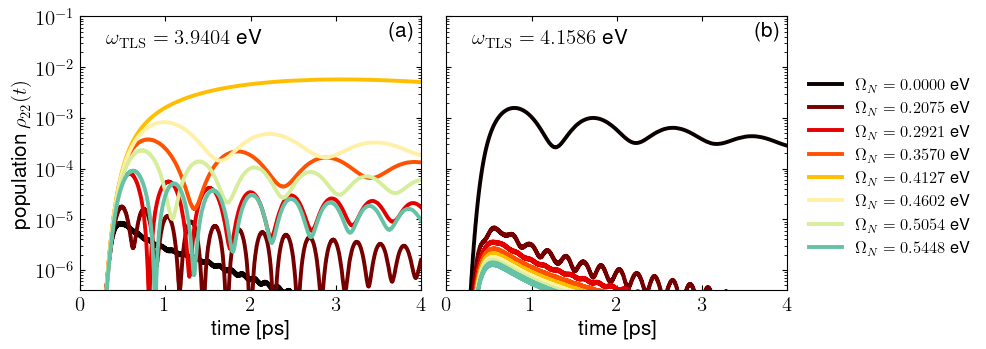

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import columnplots as clp
from scipy.optimize import curve_fit

def read_data(filename):
    data = np.loadtxt(filename, usecols=(0, 1))  # Read first and second columns
    col1, col2 = data[:, 0], data[:, 1]          # Split into two arrays
    return col1, col2

# Turn this parameter to False if LaTeX is not installed
if_latex = True

labels = []
xs=[]
ys=[]
xs2=[]
ys2=[]

### Data set 1
###---------------------------------------------------------------------------------------------------------------
sigma_numbers=[0,5,10,15,20,25,30,35]
Rabi = [0,
 0.0050170000000000076,
 0.007063,
 0.008633000000000002,
 0.009978,
 0.011126999999999998,
 0.012220999999999996,
 0.013173000000000004]
for number, rabi in zip(sigma_numbers, Rabi):
    filename = f"./Paper/Figure5/Figure_a/EM_Traj_LP_Sigma_{number}.txt"
    data1, data2 = read_data(filename)
    xs.append(data1*0.0001)
    ys.append(data2)
    labels.append("$ \\Omega_{{N}} = %.4f$ eV" %(rabi*41.357))

# Define colors, labels, and alpha values
colors = ["k", "k", "k","k","k","k","k","k"]
linestyles = ["-", "-", "-","-","-","-","-","-"]
###---------------------------------------------------------------------------------------------------------------

### Data set 2
###---------------------------------------------------------------------------------------------------------------
sigma_numbers=[0,5,10,15,20,25,30,35]
Rabi = [0,
 0.0050170000000000076,
 0.007063,
 0.008633000000000002,
 0.009978,
 0.011126999999999998,
 0.012220999999999996,
 0.013173000000000004]
for number, rabi in zip(sigma_numbers, Rabi):
    filename = f"./Paper/Figure5/Figure_b/EM_Traj_CM_Sigma_{number}.txt"
    data1, data2 = read_data(filename)
    xs2.append(data1*0.0001)
    ys2.append(data2)

# Define colors, labels, and alpha values
colors2 = ["k", "k", "k","k","k","k","k","k"]
###---------------------------------------------------------------------------------------------------------------

# Plotting using columnplots (clp)
axes = clp.initialize(col=1, row=2,
                    width=10, height=3.6,
                    LaTeX=if_latex, labelthem=True, labelsize=15, labelthemPosition=[0.98, 0.98], sharey=True, 
                    fontsize=15)
clp.plotone(xs, ys, axes[0], colors=colors, labels=labels, lw=2.8, ylog=True, xlog=False, linestyles=linestyles,  xlim=(0,4), ylim=(0.4e-6,1e-1),
            ylabel=r'population $\rho_{22}(t)$', xlabel=r"time [ps]",
            showlegend=False, yscientificAtLabel=False)
clp.plotone(xs2, ys2, axes[1], colors=colors2, labels=labels, lw=2.8, ylog=True, xlog=False, linestyles=linestyles,  xlim=(0,4), 
            xlabel=r"time [ps]",
            showlegend=True, yscientificAtLabel=False)


colormap = plt.cm.hot
colors2 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
colors3 = [colormap(i) for i in np.linspace(0.0,0.65,5)]
for i,j in enumerate(axes[0].lines[0:5]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[0:5]):
    j.set_color(colors3[i])

colormap = plt.cm.Spectral
colors2 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
colors3 = [colormap(i) for i in np.linspace(0.45,0.8,3)]
for i,j in enumerate(axes[0].lines[5:8]):
    j.set_color(colors2[i])
for i,j in enumerate(axes[1].lines[5:8]):
    j.set_color(colors3[i])

energy_ticks = [0.0,1.0,2.0,3.0,4.0]
axes[0].set_xticks(energy_ticks)
axes[1].set_xticks(energy_ticks)
axes[0].tick_params(axis='y',direction='in', which='both')
axes[1].tick_params(axis='y',direction='in', which='both')
axes[0].tick_params(axis='x',direction='in', which='both')
axes[1].legend(loc='center', bbox_to_anchor=(1.3, 0.45), framealpha=0.0, edgecolor='black', fontsize=11.8)
axes[1].text(0.3,2.85e-2, r'$\omega_{\mathrm{TLS}} = 4.1586$ eV', fontsize=15)
axes[0].text(0.3,2.85e-2, r'$\omega_{\mathrm{TLS}} = 3.9404$ eV', fontsize=15)

clp.adjust(tight_layout=True, savefile="TLS_Pulse.pdf")
